In [1]:
import pathlib
import sys

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sys.path.append(str(pathlib.Path("..").resolve()))


from source import config
from source.data import create_clean_dataset

In [11]:
def plot_class(df, cls: str = None):
    if cls is not None:
        df = df[df["LoCC"] == cls]

    stats = df["Length"].describe()
    legend_label = (f'{cls or "All"} (μ={stats["mean"]:.0f}, σ={stats["std"]:.0f}, min={stats["min"]:.0f}, max={stats["max"]:.0f})')

    sns.kdeplot(data=df, x="Length", label=legend_label, fill=False, linewidth=2)


def plot(df, each: bool = False, title: str = None):
    plt.figure(figsize=(15, 8))

    if each:
        for cls in df["LoCC"].unique():
            plot_class(df, cls)
    else:
        plot_class(df)

    plt.xlabel("Довжина файлу", fontsize=12)
    plt.ylabel("Щільність", fontsize=12)
    plt.title("Розподіл довжин файлів за класами LoCC", fontsize=14)

    plt.legend(title="Класи LoCC та їх статистика", bbox_to_anchor=(1.03, 1), loc='upper left',
            fontsize=10, title_fontsize=11, frameon=True, shadow=True)
    plt.tight_layout(rect=[0, 0, 0.83, 1])

    plt.show()

In [5]:
df = pd.read_csv(config.DATASET_DIR / "gutenberg_metadata.csv")

columns = ["LoCC", "Etext Number"]
for column in columns:
    df = df[df[column].notna()]

for filename in df["Etext Number"].unique():
    filepath = config.BOOKS_DIR / f"{filename}.txt"

    if not filepath.exists():
        df.loc[df["Etext Number"] == filename, "Length"] = 0
        continue

    df.loc[df["Etext Number"] == filename, "Length"] = filepath.stat().st_size

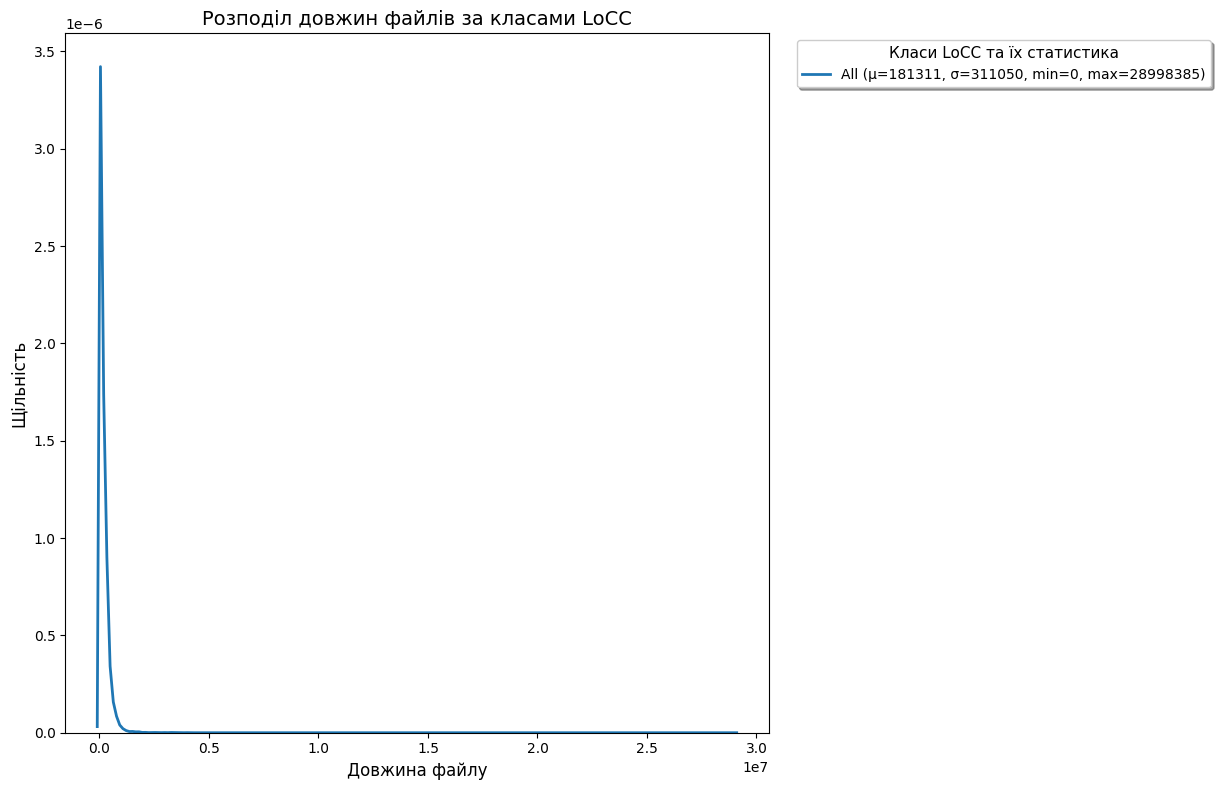

In [12]:
# Before dataset preprocess
plot(df)

In [13]:
df = create_clean_dataset()

Step 1/4: 
        Filter out non-text entries and drop not needed columns, drop entries with missing LoCC classes and Etext Number.
        
Data: (57589, 4)
Step 2/4: 
    Explode entries with multiple LoCC classes into multiple rows.
    
Data: (60079, 4)
Step 3/4: 
        Merge classes with less than min_samples entries into the root class.
        
Data: (60079, 4)
Step 4/4: 
        Undersample classes to have at most max_samples entries for each class.
        
Data: (46828, 4)


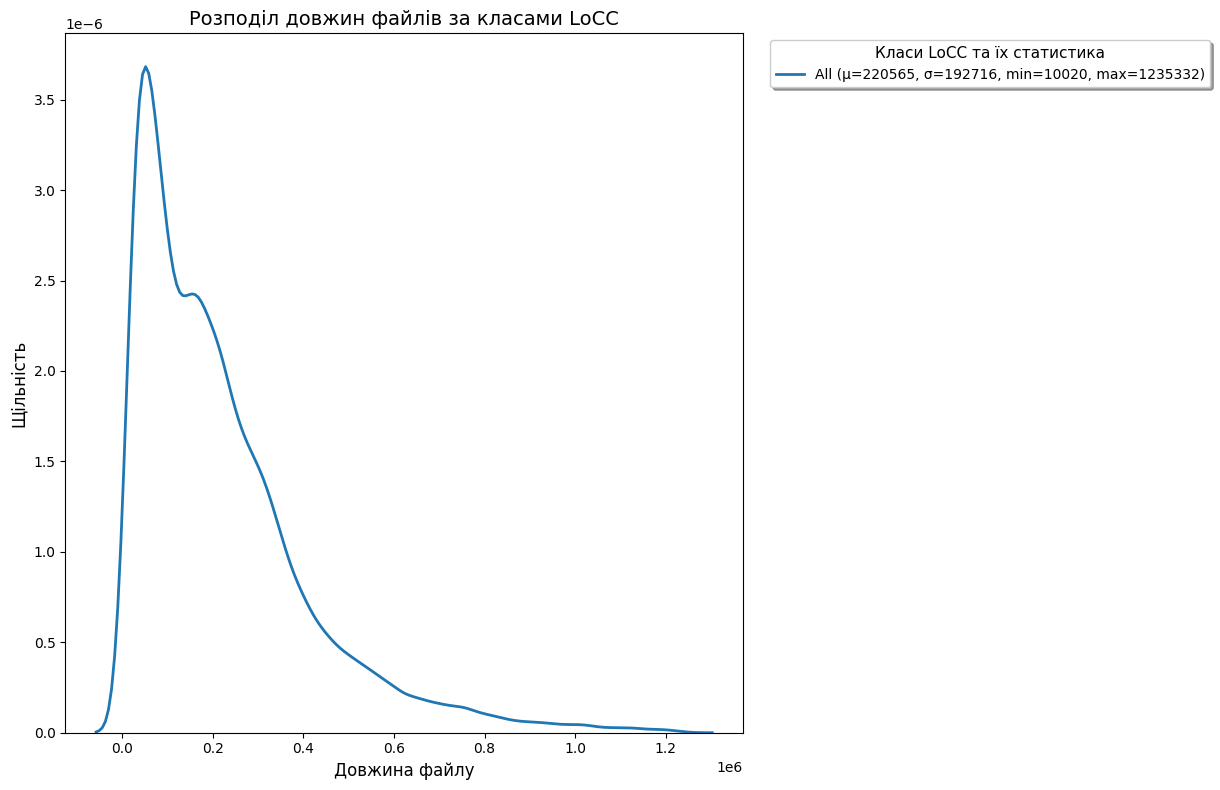

In [14]:
# After dataset preprocess
plot(df)

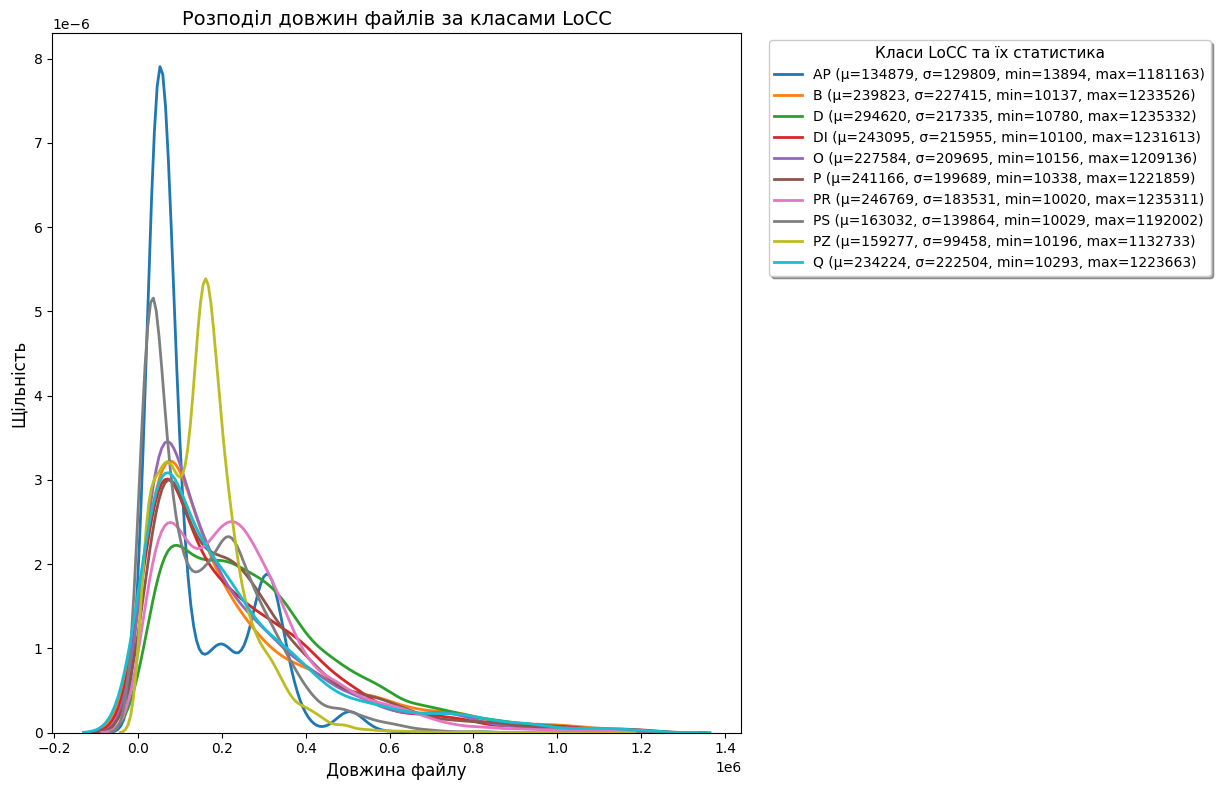

In [15]:
# After dataset preprocess, each class
plot(df, each=True)